## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

#### Answer the following question by providing Python code:

In [35]:
# Bring the data.
housing_data = fetch_california_housing()

In [36]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [37]:
housing = pd.DataFrame(housing_data.data,
                   columns=housing_data.feature_names)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

In [38]:
housing['MedHouseValue'] = housing_data.target

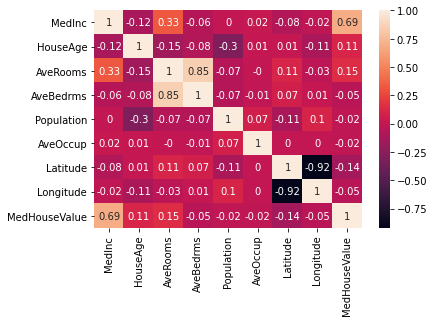

In [39]:
correlation_matrix = housing.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [40]:
b1 = tf.Variable(1.0)                # A constant initial value.
b0 = tf.Variable(1.0) 
X_ph = tf.placeholder(tf.float32)
y_ph= tf.placeholder(tf.float32)
y_model= X_ph*b1 + b0
loss = tf.reduce_mean(tf.square(y_ph - y_model))   
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)



In [41]:
X = housing['MedInc']
y = housing['MedHouseValue']

In [43]:
n_epochs = 1000                                       # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                     # Define training. Use optimizer.minimize(loss)
init = tf.global_variables_initializer()                                          # Define Variable initialization.
                                                      #Returns an Op that initializes global variablestf.global_variables_initializer().

with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)
        
        # Training.
        my_feed = {X_ph:X, y_ph:y}                    # Prepare feed data as a dictionary. 
        
        for i in range(n_epochs):
                 
            sess.run(train, feed_dict = my_feed)
        b0_model, b1_model = sess.run([b0, b1])                   # Get the final values of the Variables.
        # Testing.
        
        mse_value = sess.run(loss, feed_dict = my_feed)

In [44]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 0.701
RMSE = 0.837
